In [4]:
import pandas as pd

# Carregando o dataset fornecido
file_path = './consulta_urgencia.csv'
df = pd.read_csv(file_path, sep=';')

# Exibindo as primeiras linhas do dataset para inspeção
df.head()



,data_ref,cod_prestador,nome_prestador,nome_municipio_principal_prestador,uf_prestador,macro_regional_prestador,micro_regional_prestador,nome_municipio_principal_benef,uf_beneficiario,macro_regional_benef,micro_regional_benef,tipo_consulta,qtde_consultas,valor_consultas
0,2023_01,48008,HOSPITAL NOSSA SENHORA DA SAUDE,DOM SILVERIO,MG,LESTE DO SUL,PONTE NOVA,ALVINOPOLIS,MG,LESTE DO SUL,PONTE NOVA,URGENCIA,2,"100,8"
1,2023_01,48008,HOSPITAL NOSSA SENHORA DA SAUDE,DOM SILVERIO,MG,LESTE DO SUL,PONTE NOVA,AMPARO DO SERRA,MG,LESTE DO SUL,PONTE NOVA,URGENCIA,1,"50,4"
2,2023_01,48008,HOSPITAL NOSSA SENHORA DA SAUDE,DOM SILVERIO,MG,LESTE DO SUL,PONTE NOVA,BELO HORIZONTE,MG,CENTRO,BELO HORIZONTE,URGENCIA,1,"50,4"
3,2023_01,48008,HOSPITAL NOSSA SENHORA DA SAUDE,DOM SILVERIO,MG,LESTE DO SUL,PONTE NOVA,DOM SILVERIO,MG,LESTE DO SUL,PONTE NOVA,URGENCIA,43,"2167,2"
4,2023_01,48008,HOSPITAL NOSSA SENHORA DA SAUDE,DOM SILVERIO,MG,LESTE DO SUL,PONTE NOVA,SEM PEIXE,MG,LESTE DO SUL,PONTE NOVA,URGENCIA,4,"201,6"


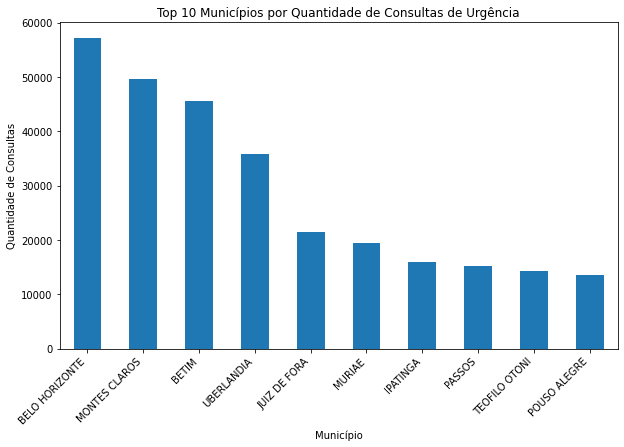

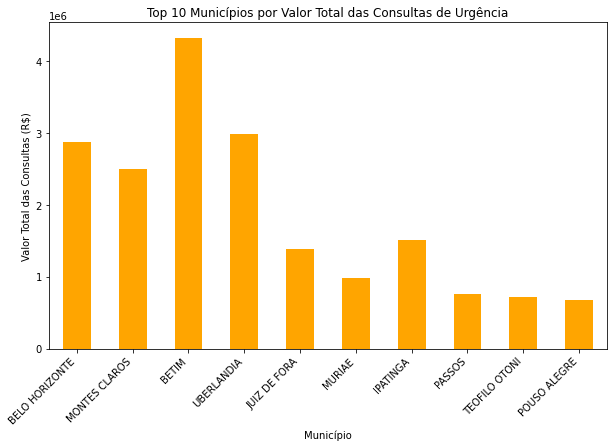

In [7]:
import matplotlib.pyplot as plt

# Agrupando os dados por município e somando a quantidade e o valor das consultas
df_municipio = df.groupby('nome_municipio_principal_prestador').agg({
    'qtde_consultas': 'sum',
    'valor_consultas': 'sum'
}).sort_values(by='qtde_consultas', ascending=False)

# Exibindo os primeiros resultados do resumo
df_municipio.head()

# Visualização da distribuição da quantidade de consultas por município
plt.figure(figsize=(10, 6))
df_municipio['qtde_consultas'].head(10).plot(kind='bar')
plt.title('Top 10 Municípios por Quantidade de Consultas de Urgência')
plt.xlabel('Município')
plt.ylabel('Quantidade de Consultas')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualização da distribuição do valor total das consultas por município
plt.figure(figsize=(10, 6))
df_municipio['valor_consultas'].head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Municípios por Valor Total das Consultas de Urgência')
plt.xlabel('Município')
plt.ylabel('Valor Total das Consultas (R$)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [11]:
# Filtrando os dados para Muriae e municípios vizinhos
municipios_regiao = ['MURIAE', 'CATAGUASES', 'UBA', 'LEOPOLDINA', 'CARANGOLA', 'MANHUAÇU', 'VIÇOSA']

# 1. Quantidade total de consultas de urgência realizadas em Muriae
consultas_muriae = df[df['nome_municipio_principal_prestador'] == 'MURIAE']['qtde_consultas'].sum()

# 2. Valor médio das consultas em Muriae comparado a outros municípios da região
valor_medio_muriae = df[df['nome_municipio_principal_prestador'] == 'MURIAE']['valor_consultas'].mean()
valor_medio_regiao = df[df['nome_municipio_principal_prestador'].isin(municipios_regiao)].groupby('nome_municipio_principal_prestador')['valor_consultas'].mean()

# 3. 5 municípios vizinhos com maior quantidade de consultas de urgência
top_5_vizinhos_consultas = df[df['nome_municipio_principal_prestador'].isin(municipios_regiao)].groupby('nome_municipio_principal_prestador')['qtde_consultas'].sum().nlargest(5)

# 4. Correlação entre quantidade de consultas e valor das consultas na região
correlacao_regiao = df[df['nome_municipio_principal_prestador'].isin(municipios_regiao)][['qtde_consultas', 'valor_consultas']].corr().loc['qtde_consultas', 'valor_consultas']

# 5. Diferença no valor total gasto em consultas entre Muriae e outros municípios da região
valor_total_muriae = df[df['nome_municipio_principal_prestador'] == 'MURIAE']['valor_consultas'].sum()
valor_total_regiao = df[df['nome_municipio_principal_prestador'].isin(municipios_regiao)].groupby('nome_municipio_principal_prestador')['valor_consultas'].sum()

# Resultados
resultados_regiao = {
    "Total de Consultas em Muriae": consultas_muriae,
    "Valor Médio das Consultas em Muriae": valor_medio_muriae,
    "Valores Médios das Consultas nos Municípios da Região": valor_medio_regiao,
    "Top 5 Municípios Vizinhos por Quantidade de Consultas": top_5_vizinhos_consultas,
    "Correlação entre Quantidade e Valor das Consultas na Região": correlacao_regiao,
    "Valor Total Gasto em Consultas - Muriae": valor_total_muriae,
    "Valor Total Gasto em Consultas - Região": valor_total_regiao
}

resultados_regiao

{'Total de Consultas em Muriae': 19390,
 'Valor Médio das Consultas em Muriae': 541.5826955074875,
 'Valores Médios das Consultas nos Municípios da Região': nome_municipio_principal_prestador
 CARANGOLA      50.400000
 CATAGUASES    270.233766
 LEOPOLDINA    348.926316
 MURIAE        541.582696
 UBA           547.321632
 Name: valor_consultas, dtype: float64,
 'Top 5 Municípios Vizinhos por Quantidade de Consultas': nome_municipio_principal_prestador
 MURIAE        19390
 UBA            8789
 LEOPOLDINA      792
 CATAGUASES      413
 CARANGOLA         6
 Name: qtde_consultas, dtype: int64,
 'Correlação entre Quantidade e Valor das Consultas na Região': 0.9999997364876083,
 'Valor Total Gasto em Consultas - Muriae': 976473.6000000001,
 'Valor Total Gasto em Consultas - Região': nome_municipio_principal_prestador
 CARANGOLA        302.4
 CATAGUASES     20808.0
 LEOPOLDINA     39777.6
 MURIAE        976473.6
 UBA           442783.2
 Name: valor_consultas, dtype: float64}